<a href="https://colab.research.google.com/github/sidhunt/ML-implementations/blob/main/Final_Project_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Combined DCNN-ELM classifier to classify CIFAR10 dataset by SIDDHANT BADOLA(ID-1154586) 
The following keras model achieves a testing accuracy of 89% on cifar10 before feature extraction after which the features are transfered to elm classifier which achieves testing accuracy of 44.79%.

In [ ]:
import tensorflow as tf
from tensorflow import keras as k
from keras.utils import np_utils,to_categorical
import matplotlib.pyplot as plt
import os
import numpy as np
from keras.models import Model

Importing CIFAR10 dataset

In [ ]:
(x_train,Y_train),(x_test,Y_test)= k.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
print(x_train.shape)

(50000, 32, 32, 3)


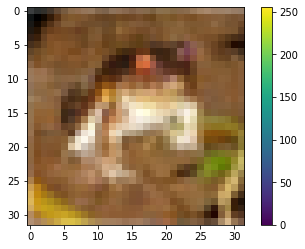

In [ ]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
def preprocess(X,Y):
  X=k.applications.densenet.preprocess_input(X)
  Y=to_categorical(Y)
  return X,Y

x_train,y_train=preprocess(x_train,Y_train)
x_test,y_test=preprocess(x_test,Y_test)


Keras model intitalization

In [ ]:

init= k.initializers.he_normal()
inp_tensor = k.Input(shape=(32,32,3))
resized_img=k.layers.Lambda(lambda image: tf.image.resize(image,(224,224)))(inp_tensor)
mod=k.applications.DenseNet201(include_top=False,weights='imagenet',input_tensor=resized_img,input_shape=(224,224,3),pooling='max',)
for layer in mod.layers:
  layer.trainable=False

out=mod.layers[-1].output
flat=k.layers.Flatten()
out=flat(out)

Dlayer = k.layers.Dense(units=256,
                           activation='elu',
                           kernel_initializer=init,
                           kernel_regularizer=k.regularizers.l2())
out = Dlayer(out)
dropout = k.layers.Dropout(0.5)
out = dropout(out)
softmax = k.layers.Dense(units=10,
                         activation='softmax',
                         kernel_initializer=init,
                         kernel_regularizer=k.regularizers.l2())
out = softmax(out)
model = k.models.Model(inputs=inp_tensor, outputs=out)

schedule=k.optimizers.schedules.ExponentialDecay(initial_learning_rate=1e-2,decay_steps=100000,decay_rate=0.95,staircase=True,)   
sgd=k.optimizers.SGD(learning_rate=schedule)
model.compile(optimizer=sgd,metrics=['accuracy'],loss=k.losses.CategoricalCrossentropy(from_logits=False,))

74842112/74836368 [==============================] - 1s 0us/step


Model summary

In [ ]:
model.summary()
print(len(model.layers))

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 224, 224, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           lambda[0][0]                     
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
_______________________________________________________________________________________

Training and re-building model 3 times

In [ ]:
history=model.fit(x_train,y_train, epochs=10,steps_per_epoch=100,validation_data=(x_test,y_test),verbose=1,batch_size=128,use_multiprocessing=True,) 
loss,acc=model.evaluate(x_test,y_test,verbose='1')
print("loss=",loss,"\nacc=",acc)

Epoch 1/10
100/100 [==============================] - 89s 889ms/step - loss: 6.7622 - accuracy: 0.5880 - val_loss: 5.6538 - val_accuracy: 0.8145
Epoch 2/10
100/100 [==============================] - 88s 879ms/step - loss: 5.7429 - accuracy: 0.7647 - val_loss: 5.3576 - val_accuracy: 0.8440
Epoch 3/10
100/100 [==============================] - 90s 896ms/step - loss: 5.4387 - accuracy: 0.7952 - val_loss: 5.1348 - val_accuracy: 0.8549
Epoch 4/10
100/100 [==============================] - 92s 921ms/step - loss: 5.2091 - accuracy: 0.8072 - val_loss: 4.9401 - val_accuracy: 0.8538
Epoch 5/10
100/100 [==============================] - 90s 903ms/step - loss: 4.9573 - accuracy: 0.8251 - val_loss: 4.7319 - val_accuracy: 0.8642
Epoch 6/10
100/100 [==============================] - 91s 910ms/step - loss: 4.7388 - accuracy: 0.8390 - val_loss: 4.5352 - val_accuracy: 0.8722
Epoch 7/10
100/100 [==============================] - 91s 913ms/step - loss: 4.5537 - accuracy: 0.8417 - val_loss: 4.3691 - val_ac

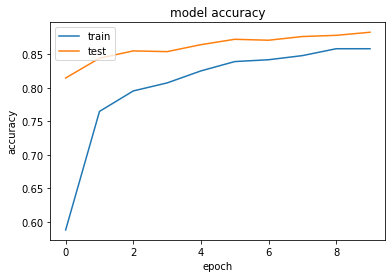

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.compile(optimizer=sgd,metrics=['accuracy'],loss=k.losses.CategoricalCrossentropy(from_logits=False,))
history=model.fit(x_train,y_train, epochs=10,steps_per_epoch=100,validation_data=(x_test,y_test),verbose=1,batch_size=128,use_multiprocessing=True,) 
loss,acc=model.evaluate(x_test,y_test,verbose='1')
print("loss=",loss,"\nacc=",acc)

Epoch 1/10
100/100 [==============================] - 93s 927ms/step - loss: 3.8784 - accuracy: 0.8650 - val_loss: 3.7394 - val_accuracy: 0.8828
Epoch 2/10
100/100 [==============================] - 91s 910ms/step - loss: 3.7239 - accuracy: 0.8701 - val_loss: 3.6002 - val_accuracy: 0.8864
Epoch 3/10
100/100 [==============================] - 91s 909ms/step - loss: 3.5811 - accuracy: 0.8706 - val_loss: 3.4700 - val_accuracy: 0.8884
Epoch 4/10
100/100 [==============================] - 91s 907ms/step - loss: 3.4484 - accuracy: 0.8764 - val_loss: 3.3506 - val_accuracy: 0.8857
Epoch 5/10
100/100 [==============================] - 91s 906ms/step - loss: 3.3129 - accuracy: 0.8773 - val_loss: 3.2270 - val_accuracy: 0.8850
Epoch 6/10
100/100 [==============================] - 91s 910ms/step - loss: 3.1995 - accuracy: 0.8775 - val_loss: 3.1070 - val_accuracy: 0.8901
Epoch 7/10
100/100 [==============================] - 91s 910ms/step - loss: 3.0961 - accuracy: 0.8755 - val_loss: 2.9958 - val_ac

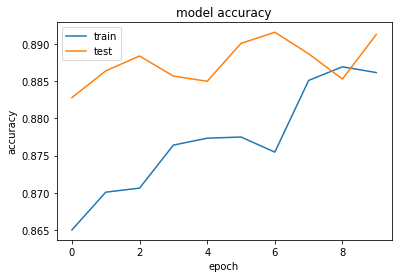

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.compile(optimizer=sgd,metrics=['accuracy'],loss=k.losses.CategoricalCrossentropy(from_logits=False,))
history=model.fit(x_train,y_train, epochs=10,steps_per_epoch=100,validation_data=(x_test,y_test),verbose=1,batch_size=128,use_multiprocessing=True,) 
loss,acc=model.evaluate(x_test,y_test,verbose='1')
print("loss=",loss,"\nacc=",acc)

Epoch 1/10
100/100 [==============================] - 92s 921ms/step - loss: 2.6560 - accuracy: 0.8930 - val_loss: 2.6022 - val_accuracy: 0.8911
Epoch 2/10
100/100 [==============================] - 90s 900ms/step - loss: 2.5598 - accuracy: 0.8931 - val_loss: 2.5130 - val_accuracy: 0.8918
Epoch 3/10
100/100 [==============================] - 90s 905ms/step - loss: 2.4945 - accuracy: 0.8847 - val_loss: 2.4243 - val_accuracy: 0.8953
Epoch 4/10
100/100 [==============================] - 90s 905ms/step - loss: 2.4040 - accuracy: 0.8912 - val_loss: 2.3490 - val_accuracy: 0.8944
Epoch 5/10
100/100 [==============================] - 91s 908ms/step - loss: 2.3041 - accuracy: 0.8973 - val_loss: 2.2660 - val_accuracy: 0.8930
Epoch 6/10
100/100 [==============================] - 91s 909ms/step - loss: 2.2310 - accuracy: 0.8967 - val_loss: 2.1896 - val_accuracy: 0.8948
Epoch 7/10
100/100 [==============================] - 91s 908ms/step - loss: 2.1593 - accuracy: 0.8952 - val_loss: 2.1191 - val_ac

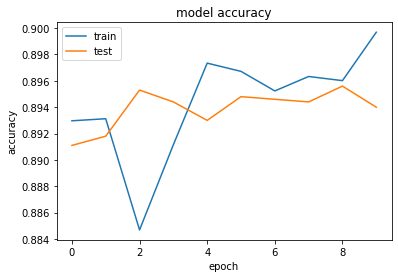

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
import numpy as np

In [ ]:
W=model.get_weights()
model.save_weights("out_weights.h5")
#np.savetxt("output_weights.txt",W,fmt='%s')

In [ ]:
!pip install hpelm
from hpelm import ELM

     |████████████████████████████████| 51kB 6.8MB/s 
     |████████████████████████████████| 163kB 21.9MB/s 


In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
#X=np.reshape(x_test,(10000,-1))
X=np.reshape(x_train,(50000,-1))

In [ ]:
Xt=np.reshape(x_test,(10000,-1))

In [ ]:
X.shape

(50000, 3072)

Command below extracts the features from the trained model 

In [ ]:
#features=model.predict(x_test[:1])
features=model.predict(x_train)

In [ ]:
print(features.shape)

(50000, 10)


In [ ]:
print(features)

[[3.4666864e-05 9.5382893e-06 7.5984834e-04 ... 2.9465637e-05
  3.8691498e-05 9.6623453e-06]
 [1.2189142e-04 9.2762690e-03 5.3377439e-06 ... 1.3972379e-05
  1.5776260e-03 9.8895836e-01]
 [5.6265086e-01 4.1351438e-02 8.7544732e-03 ... 7.2358256e-05
  5.1144775e-02 3.3513397e-01]
 ...
 [1.8341857e-03 1.5448707e-02 4.4659420e-04 ... 2.7186077e-04
  4.9883265e-02 9.2873681e-01]
 [3.9955856e-05 9.9968135e-01 1.0343287e-05 ... 1.6605919e-06
  6.6988228e-05 1.9246714e-04]
 [8.2455836e-03 9.3691874e-01 2.7769856e-04 ... 1.6311705e-04
  3.3018656e-02 2.1206034e-02]]


We feed the features into given ELM classifier

In [ ]:


elm=ELM(3072,10, w=features[0])
elm.add_neurons(1000,func='tanh')
elm.add_neurons(1000,func='sigm')
elm.train(X,y_train,'c')

In [ ]:
Y=elm.predict(Xt)

In [ ]:
Y.shape

(10000, 10)

In [ ]:
print(np.argmax(Y[102]))

6


In [ ]:
(x_trainF,y_trainF),(x_testF,y_testF)= k.datasets.cifar10.load_data()

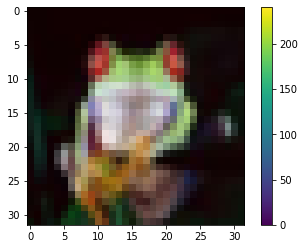

In [ ]:
plt.figure()
plt.imshow(x_testF[102])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
x_test[:1].shape

(1, 32, 32, 3)

We finally get classification error below

In [ ]:
elm.error(y_test,Y)

0.5521

In [ ]:
acc=0
total=x_test.shape[0]
for i in range(total):
  pred=np.argmax(Y[i])
  act=np.argmax(y_test[i])
  print(i," pred=",pred,"\t actual=",act)
  if(pred==act):
    acc+=1
    print("matches")

  
print("Accuracy =",(acc/total))

Streaming output truncated to the last 5000 lines.
matches
6510  pred= 6 	 actual= 4
6511  pred= 3 	 actual= 7
6512  pred= 6 	 actual= 2
6513  pred= 7 	 actual= 5
6514  pred= 7 	 actual= 3
6515  pred= 5 	 actual= 2
6516  pred= 2 	 actual= 2
matches
6517  pred= 9 	 actual= 7
6518  pred= 6 	 actual= 6
matches
6519  pred= 2 	 actual= 2
matches
6520  pred= 4 	 actual= 6
6521  pred= 4 	 actual= 4
matches
6522  pred= 9 	 actual= 9
matches
6523  pred= 6 	 actual= 6
matches
6524  pred= 8 	 actual= 8
matches
6525  pred= 9 	 actual= 3
6526  pred= 8 	 actual= 8
matches
6527  pred= 5 	 actual= 5
matches
6528  pred= 7 	 actual= 5
6529  pred= 2 	 actual= 2
matches
6530  pred= 6 	 actual= 3
6531  pred= 4 	 actual= 4
matches
6532  pred= 5 	 actual= 5
matches
6533  pred= 9 	 actual= 2
6534  pred= 7 	 actual= 7
matches
6535  pred= 1 	 actual= 5
6536  pred= 7 	 actual= 1
6537  pred= 8 	 actual= 5
6538  pred= 1 	 actual= 3
6539  pred= 7 	 actual= 7
matches
6540  pred= 8 	 actual= 8
matches
6541  pred= 1 	

Final ELM accuracy obtained is 0.4479 for cifar10